# Reading Files form input

In [6]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

data = pd.read_csv("C:/YCCE/LABs/NAA lab/MSPA4/train_data/train_data.csv")
                   

In [7]:
data.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558,41-50


In [8]:
data.describe()

,case_id,Hospital_code,City_Code_Hospital,Available Extra Rooms in Hospital,Bed Grade,patientid,City_Code_Patient,Visitors with Patient,Admission_Deposit
count,5001.000000,5001.000000,5001.000000,5001.000000,4999.000000,5001.000000,4959.000000,5001.000000,5001.000000
mean,2501.000000,18.841032,4.697261,3.171766,2.487497,67583.936613,6.872757,3.276745,4894.865627
std,1443.808678,8.718700,3.234305,1.147123,0.818084,37496.192924,4.425182,1.734300,1025.324568
min,1.000000,1.000000,1.000000,1.000000,1.000000,170.000000,1.000000,1.000000,1995.000000
25%,1251.000000,11.000000,2.000000,2.000000,2.000000,36786.000000,4.000000,2.000000,4216.000000
50%,2501.000000,21.000000,4.000000,3.000000,2.000000,69497.000000,8.000000,3.000000,4776.000000
75%,3751.000000,26.000000,7.000000,4.000000,3.000000,99754.000000,8.000000,4.000000,5401.000000
max,5001.000000,32.000000,13.000000,10.000000,4.000000,131488.000000,28.000000,24.000000,9758.000000


# Prepocessing the data

In [9]:
X = data.drop('Stay',axis='columns')
y = data['Stay']

In [10]:
from sklearn.preprocessing import OrdinalEncoder,StandardScaler
from sklearn.impute import SimpleImputer

In [11]:
from sklearn import set_config
set_config(display="diagram")

# creating pipeline

In [12]:
from sklearn.pipeline import Pipeline

steps = [("encoder",OrdinalEncoder()),
        ("scaler",StandardScaler()),
        ("imputer",SimpleImputer(strategy='mean'))
        ]

In [13]:
pipe = Pipeline(steps)

In [14]:
X_transformed = pipe.fit_transform(X)

In [15]:
X_t = pd.DataFrame(X_transformed,columns=X.columns)

In [16]:
X_t.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit
0,-1.731705,-1.243547,0.354846,-0.515270,1.575132,-0.149751,1.957267,0.126041,1.061733,-0.595961,-0.986997,0.044298,-1.248315,-1.500592,-0.777039,0.40501,0.133431
1,-1.731012,-1.931792,0.354846,0.170066,1.575132,-1.021584,1.957267,1.357157,1.061733,-0.595961,-0.986997,0.044298,0.366069,-1.500592,-0.777039,0.40501,1.246953
2,-1.730319,-1.014132,1.626951,-1.200606,-1.078476,-1.021584,-1.670714,1.357157,0.465938,-0.595961,-0.986997,0.044298,0.366069,-1.500592,-0.777039,0.40501,-0.088381
3,-1.729626,0.821187,-0.281206,-0.857938,0.248328,-1.021584,1.957267,0.126041,-0.129857,-0.595961,-0.986997,0.044298,0.366069,-1.500592,-0.777039,0.40501,1.896011
4,-1.728934,0.821187,-0.281206,-0.857938,0.248328,-1.021584,1.957267,1.357157,-0.129857,-0.595961,-0.986997,0.044298,0.366069,-1.500592,-0.777039,0.40501,0.901582


In [17]:
X_t.describe()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit
count,5001.000000,5.001000e+03,5.001000e+03,5.001000e+03,5.001000e+03,5.001000e+03,5.001000e+03,5.001000e+03,5.001000e+03,5.001000e+03,5.001000e+03,5.001000e+03,5.001000e+03,5.001000e+03,5.001000e+03,5.001000e+03,5.001000e+03
mean,0.000000,1.094017e-16,3.978244e-17,1.136641e-17,1.420801e-18,1.982018e-16,6.251526e-17,9.093128e-17,1.136641e-16,4.404484e-17,-8.808968e-17,1.193473e-16,-5.683205e-18,-5.114885e-17,-7.956487e-17,-1.591297e-16,1.420801e-17
std,1.000100,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,9.999000e-01,1.000100e+00,9.958916e-01,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00
min,-1.731705,-2.046500e+00,-9.172587e-01,-1.200606e+00,-1.078476e+00,-1.893418e+00,-3.484705e+00,-2.336191e+00,-1.917244e+00,-1.818452e+00,-1.742516e+00,-1.379073e+00,-1.248315e+00,-1.500592e+00,-1.390936e+00,-1.914035e+00,-1.894132e+00
25%,-0.865852,-8.994249e-01,-9.172587e-01,-8.579379e-01,-1.078476e+00,-1.021584e+00,1.432766e-01,-1.105075e+00,-7.256529e-01,-5.959611e-01,-8.515737e-01,-6.673877e-01,-1.248315e+00,-1.500592e+00,-7.770388e-01,-9.864171e-01,-7.835875e-01
50%,0.000000,2.476498e-01,-2.812062e-01,-1.726017e-01,2.483281e-01,-1.497510e-01,1.432766e-01,1.260411e-01,4.659380e-01,-5.959611e-01,7.295005e-03,2.815265e-01,3.660690e-01,7.745209e-01,-1.631413e-01,-5.226082e-01,-4.520919e-02
75%,0.865852,8.211871e-01,3.548463e-01,8.554026e-01,2.483281e-01,7.220824e-01,1.432766e-01,1.357157e+00,1.061733e+00,6.265295e-01,8.519086e-01,2.815265e-01,3.660690e-01,7.745209e-01,4.507562e-01,8.688187e-01,7.422951e-01
max,1.731705,1.509432e+00,2.899057e+00,2.226075e+00,1.575132e+00,5.953083e+00,3.771258e+00,2.588273e+00,1.061733e+00,1.849020e+00,1.710777e+00,4.551641e+00,1.980453e+00,7.745209e-01,7.817526e+00,2.260246e+00,2.085072e+00


In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_t, y, test_size=0.25, random_state=42)

In [28]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(hidden_layer_sizes=(500,175,100,25),
                    batch_size=4,
                    solver='adam',
                    warm_start=True,
                    momentum=0.8,
                    activation='relu',
                    validation_fraction=0.2,
                    max_iter=2000)

In [29]:
model.fit(X_train, y_train)

y_predicted = model.predict(X_test)

In [30]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predicted)

0.3317346123101519

In [17]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_predicted, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)

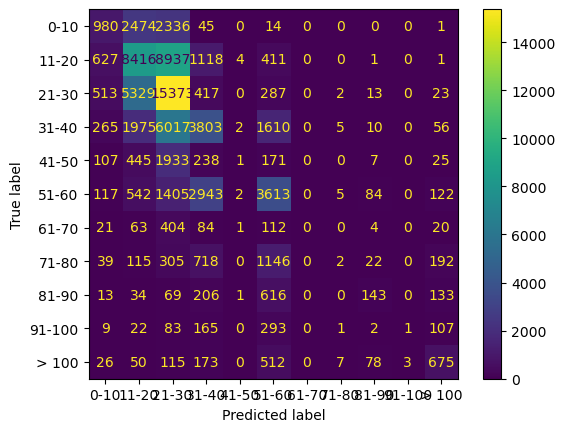

In [18]:
disp.plot()